In [1]:
!pwd

/panda/eedy/ion_los-angle/s1_a166/notebook


In [2]:
import os
import h5py
import numpy as np
import mintpy
from mintpy.objects import ifgramStack
from mintpy.utils import readfile, writefile, plot, utils as ut

ERROR 1: PROJ: proj_create_from_database: Open of /home/eedy/tools/mambaforge/envs/insar/share/proj failed


In [3]:
path = '../mintpy_no_ion_upsample/geo/geo_velocity.h5'
with h5py.File(path, 'r') as file:
    residue = file['residue']
    residue = residue[()]

path2 = '../mintpy_no_ion_upsample/geo/geo_maskTempCoh.h5'
with h5py.File(path2, 'r') as file:
    mask = file['mask']
    mask = mask[()]

masked_residue = np.where(mask == 0, np.nan, residue)
mean = np.nanmean(masked_residue)
# 计算中位数
median = np.nanmedian(masked_residue)
# 计算离散
variance = np.nanvar(masked_residue)
print("Mean:", mean)
print("Median:", median)
print("Variance:", variance)

Mean: 0.22565705
Median: 0.2235712
Variance: 0.0014998942


In [4]:
path = '../mintpy_split_ion_upsample/geo/geo_velocity.h5'
with h5py.File(path, 'r') as file:
    residue = file['residue']
    residue = residue[()]

path2 = '../mintpy_split_ion_upsample/geo/geo_maskTempCoh.h5'
with h5py.File(path2, 'r') as file:
    mask = file['mask']
    mask = mask[()]

masked_residue_split = np.where(mask == 0, np.nan, residue)
mean = np.nanmean(masked_residue_split)
# 计算中位数
median = np.nanmedian(masked_residue_split)
# 计算离散度
variance = np.nanvar(masked_residue_split)
print("Mean:", mean)
print("Median:", median)
print("Variance:", variance)

Mean: 0.22635016
Median: 0.21790692
Variance: 0.00434393


In [5]:
path = '../mintpy_gim_ion_upsample/geo/geo_velocity.h5'
with h5py.File(path, 'r') as file:
    residue = file['residue']
    residue = residue[()]

path2 = '../mintpy_gim_ion_upsample/geo/geo_maskTempCoh.h5'
with h5py.File(path2, 'r') as file:
    mask = file['mask']
    mask = mask[()]

masked_residue_gim = np.where(mask == 0, np.nan, residue)
mean = np.nanmean(masked_residue_gim)
# 计算中位数
median = np.nanmedian(masked_residue_gim)
# 计算离散度
variance = np.nanvar(masked_residue_gim)
print("Mean:", mean)
print("Median:", median)
print("Variance:", variance)

Mean: 0.22987148
Median: 0.2255897
Variance: 0.001706439


In [6]:
path = '../mintpy_hight_gim_ion_upsample/geo/geo_velocity.h5'
with h5py.File(path, 'r') as file:
    residue = file['residue']
    residue = residue[()]

path2 = '../mintpy_hight_gim_ion_upsample/geo/geo_maskTempCoh.h5'
with h5py.File(path2, 'r') as file:
    mask = file['mask']
    mask = mask[()]

masked_residue_hight_gim = np.where(mask == 0, np.nan, residue)
mean = np.nanmean(masked_residue_hight_gim)
# 计算中位数
median = np.nanmedian(masked_residue_hight_gim)
# 计算离散度
variance = np.nanvar(masked_residue_hight_gim)
print("Mean:", mean)
print("Median:", median)
print("Variance:", variance)

Mean: 0.21280359
Median: 0.20663464
Variance: 0.002205307


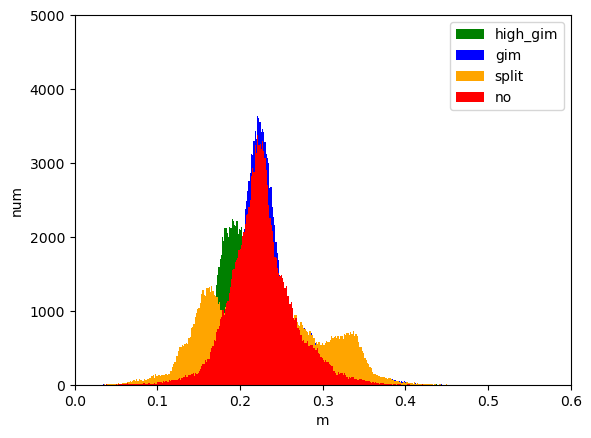

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# 将二维数组转换为一维数组
masked_residue_flat = masked_residue.flatten()
masked_residue_gim_flat = masked_residue_gim.flatten()
masked_residue_split_flat = masked_residue_split.flatten()
masked_residue_hight_gim_flat = masked_residue_hight_gim.flatten()

# 创建图形和坐标轴
fig, ax = plt.subplots()

# 设置横纵坐标范围
ax.set_xlim([0, 0.6])  # 将 xmin 和 xmax 替换为你想要的实际范围
ax.set_ylim([0, 5000])  # 将 ymin 和 ymax 替换为你想要的实际范围
# 绘制直方图
ax.hist(masked_residue_hight_gim_flat, bins=300, alpha=1, color='green' ,label= 'high_gim')
ax.hist(masked_residue_gim_flat, bins=300, alpha=1, color='blue',label= 'gim')
ax.hist(masked_residue_split_flat, bins=300, alpha=1, color='orange',label= 'split')
ax.hist(masked_residue_flat, bins=300, alpha=1, color='red',label= 'no')
# 添加图例
ax.legend()

# 设置坐标轴标签
ax.set_xlabel('m')
ax.set_ylabel('num')

# 设置图形标题
#ax.set_title('Histogram')

# 显示图形
plt.show()